#Clustering | Assignment


#Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.


Answer:

K-Means is a fast, iterative partitioning algorithm requiring a predefined number of clusters (\(K\)) and is ideal for large datasets, whereas Hierarchical Clustering (HCA) builds a nested tree (dendrogram) without needing to specify \(K\) beforehand, making it better for smaller, complex datasets. K-Means excels with spherical clusters, while HCA can handle arbitrary shapes and provides a hierarchy.

Key Differences:

* Number of Clusters (\(K\)): K-Means requires pre-defining \(K\); HCA does not.
* Structure: K-Means produces flat, non-overlapping clusters; HCA creates a dendrogram, allowing for hierarchical interpretation.
* Scalability: K-Means is faster and scales to large datasets, while HCA is computationally expensive (\(O(n^{3})\)).
* Sensitivity: K-Means is sensitive to outliers and initialization; HCA is generally more robust but sensitive to noise.
* Approach: K-Means works by assigning points to the nearest centroid; HCA works by merging (agglomerative) or splitting (divisive) clusters.

Use Case: K-Means

* Customer Segmentation (Large Scale): A retail company with millions of users can use K-Means to segment customers based on purchasing behavior (e.g., recency, frequency, monetary value) to target specific marketing campaigns.

Use Case: Hierarchical Clustering

* Document/Taxonomy Clustering: A news platform or library can use hierarchical clustering to group thousands of articles into a nested structure (e.g., Politics -> Local -> City Council), allowing users to explore relationships between topics.


#Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

Answer :

The Silhouette Score measures the quality of clustering algorithms by evaluating how well-separated clusters are and how close data points are to their own clusters (cohesion) versus neighboring clusters (separation). Ranging from -1 to +1, a higher score indicates well-defined, distinct clusters, helping to identify the optimal cluster count.


# Key Aspects of the Silhouette Score

*  Purpose: It validates cluster performance without requiring ground truth labels, making it ideal for unsupervised learning.

*  Components

> Cohesion (\(a_{i}\)): Average distance between a sample and all other points in the same cluster.

> Separation (\(b_{i}\)): Average distance between a sample and all points in the nearest cluster.

 *   Interpretation:
  >Near +1: Indicates points are well-clustered.
  >Near 0: Suggests overlapping clusters.                        
  >Near -1: Indicates points might be in the wrong cluster.

*  Usage: It is commonly used to determine the optimal number of clusters (\(k\)) by choosing the \(k\) that maximizes the overall average silhouette score.

The score is most effective for convex-shaped clusters and can be calculated using various distance metrics, such as Euclidean or Manhattan distance.


#Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

Answer:

The DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm uses density to discover clusters, and its behavior is governed primarily by two core parameters. These parameters control how dense a region must be to count as a cluster and how close points must be to one another to be considered neighbors.

#1. eps (epsilon) – Neighborhood radius

This parameter sets the maximum distance between two points for them to be considered neighbors in the density sense.

* Smaller eps → requires points to be very close together to form clusters, often resulting in many small clusters or more noise points if points don’t have enough neighbors.

* Larger eps → expands neighborhoods so points farther apart count as neighbors, often merging clusters together and possibly reducing the number of clusters.

In other words, eps defines the neighborhood size that the algorithm uses to assess density. Pick too small a radius and almost every point is an outlier; pick too large and distinct clusters blend together.

#2. minPts (min_samples) – Minimum points for dense region

This parameter specifies the minimum number of points that must fall inside the eps radius neighborhood for a point to be considered a core point.

* Higher minPts → increases the required density to form a cluster, leading to fewer but more robust clusters and more points labeled as noise.

* Lower minPts → easier for points to qualify as core points, potentially forming more clusters and possibly capturing more noise as clusters.

A common rule of thumb is to set minPts at least to the dimensionality of the dataset plus one (e.g., minPts ≥ D + 1), to meaningfully define density in a D-dimensional space.

# How they interact

The combination of eps and minPts controls cluster formation through density reachability and connectivity. A point must have at least minPts neighbors within eps to be a core point, and clusters grow by chaining together core points and their neighbors.

The combination of eps and minPts controls cluster formation through density reachability and connectivity. A point must have at least minPts neighbors within eps to be a core point, and clusters grow by chaining together core points and their neighbors.

In summary, eps sets the neighborhood scale for density, and minPts sets the minimum local density threshold. Tuning them is essential to tailor DBSCAN’s clustering behavior to the structure of your data.

#Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?


Answer:

Feature scaling is critical for distance-based clustering algorithms like K-Means and DBSCAN because they calculate the Euclidean distance between data points to determine similarity. Without scaling, features with larger numerical ranges can disproportionately dominate these calculations, leading to biased results and poor cluster identification.

#Why feature scaling matters for K-Means

🔹 Distance sensitivity — K-Means uses Euclidean distance to measure similarity between points and centroids. If one feature has a much larger range than others (e.g., income in thousands vs age in tens), it will dominate the distance computation, giving it undue influence on cluster formation.

🔹 Balanced contribution — Scaling (like standardization or normalization) brings features to a similar range so that no single feature dominates the distances, allowing the algorithm to form clusters based on a balanced view of all features.

🔹 Better convergence & meaningful centroids — Proper scaling often improves how quickly K-Means converges on a solution and makes the resulting cluster centroids easier to interpret across all features

#Why feature scaling matters for DBSCAN

🔹 Distance & density definitions — DBSCAN defines clusters based on the distance between points (e.g., within an epsilon radius) and the density of points. If features aren’t scaled similarly, a feature with large values can artificially stretch distances, meaning points that should be “close” appear far apart, skewing density estimates.

🔹 Epsilon interpretation — The eps parameter in DBSCAN represents a threshold distance. Without scaling, your choice of eps might not reflect true closeness in all feature dimensions because one feature’s scale could dominate the distance metric.

🔹 Equal weighting of features — By scaling, each feature contributes comparably to the notion of “neighborhood,” helping DBSCAN more accurately identify dense regions.

#Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

Dataset:

Use make_blobs, make_moons, and sklearn.datasets.load_wine() as specified


Answer:

The Elbow Method is a visual heuristic used in K-Means clustering to identify the optimal number of clusters (\(K\)) for a given dataset. It balances the trade-off between maximizing cluster compactness and minimizing model complexity.

#How the Elbow Method Works

> 1   Calculate WCSS (Inertia): The method calculates the Within-Cluster Sum of Squares (WCSS), also known as Inertia, for a range of \(K\) values (e.g., 1 to 10).

* WCSS is the sum of the squared distances between each data point and its assigned cluster centroid.

> 2 Plot Results: A line graph is plotted with the number of clusters (\(K\)) on the x-axis and WCSS on the y-axis.

> 3 Identify the "Elbow": As \(K\) increases, WCSS naturally decreases because more centroids pull points closer. The optimal \(K\) is located at the "elbow" point—the specific value where the rate of WCSS decrease sharply slows down, forming a bend in the graph.

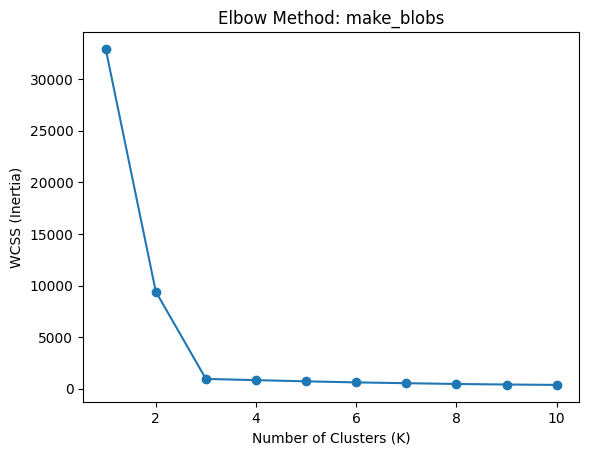

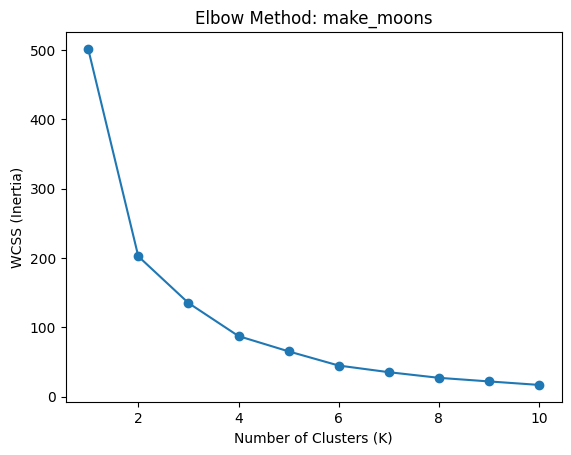

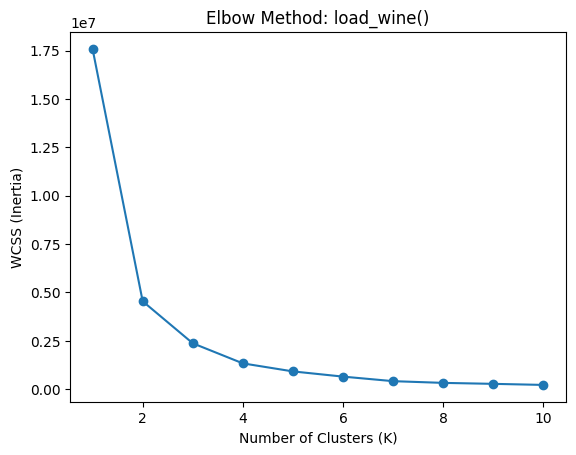

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons, load_wine
import matplotlib.pyplot as plt

def plot_elbow(data, title):
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss, marker='o')
    plt.title(f'Elbow Method: {title}')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('WCSS (Inertia)')
    plt.show()

# 1. Blobs (Synthetic structured data)
X_blobs, _ = make_blobs(n_samples=500, centers=3, random_state=42)
plot_elbow(X_blobs, "make_blobs")

# 2. Moons (Non-spherical data - Elbow method may be less clear)
X_moons, _ = make_moons(n_samples=500, noise=0.05, random_state=42)
plot_elbow(X_moons, "make_moons")

# 3. Wine Dataset (Real-world multivariate data)
wine = load_wine()
X_wine = wine.data # Note: Feature scaling is recommended for this dataset
plot_elbow(X_wine, "load_wine()")


#Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.
(Include your Python code and output in the code box below.)


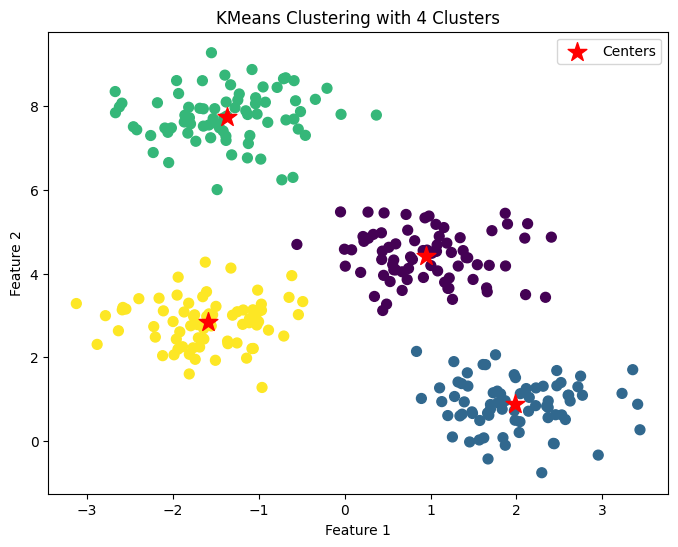

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic data with 300 samples and 4 centers
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 2. Create and fit the KMeans model (with 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=0, n_init='auto')
kmeans.fit(X)

# 3. Predict cluster labels
y_kmeans = kmeans.predict(X)

# 4. Get cluster centers
centers = kmeans.cluster_centers_

# 5. Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', s=50)

# 6. Plot the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='*', label='Centers')

plt.title("KMeans Clustering with 4 Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


#Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).
(Include your Python code and output in the code box below.)


In [5]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data  # features matrix

# 2. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # you can adjust eps and min_samples
labels = dbscan.fit_predict(X_scaled)

# 4. Count clusters (excluding noise label -1)
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

print("Cluster labels assigned (including noise):", unique_labels)
print("Number of clusters found (excluding noise):", n_clusters)


Cluster labels assigned (including noise): {np.int64(-1)}
Number of clusters found (excluding noise): 0


#Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.
(Include your Python code and output in the code box below.)


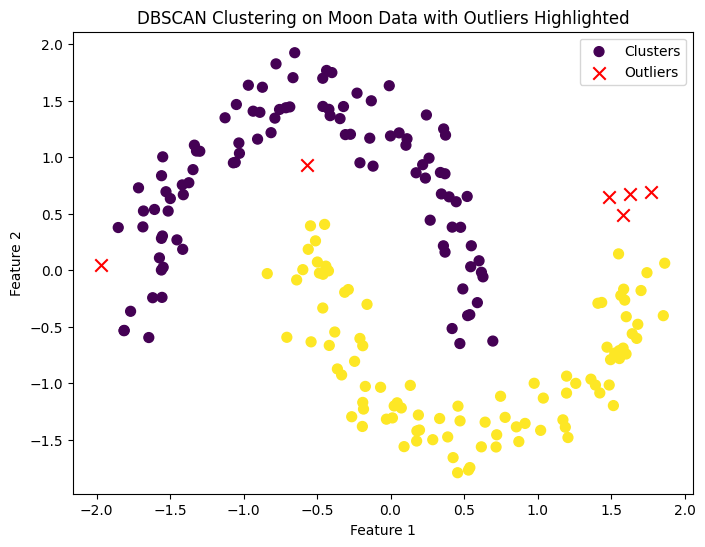

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 1. Generate moon-shaped data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# 2. Standardize features (important for DBSCAN distance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)  # tune eps and min_samples as needed
labels = dbscan.fit_predict(X_scaled)

# 4. Identify outliers (label -1)
outliers = labels == -1
clusters = labels != -1

# 5. Plot clustered data
plt.figure(figsize=(8, 6))

# Plot regular clustered points
plt.scatter(X_scaled[clusters, 0], X_scaled[clusters, 1],
            c=labels[clusters], cmap='viridis', s=50, label='Clusters')

# Highlight outliers
plt.scatter(X_scaled[outliers, 0], X_scaled[outliers, 1],
            c='red', marker='x', s=80, label='Outliers')

plt.title("DBSCAN Clustering on Moon Data with Outliers Highlighted")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


#Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.
(Include your Python code and output in the code box below.)

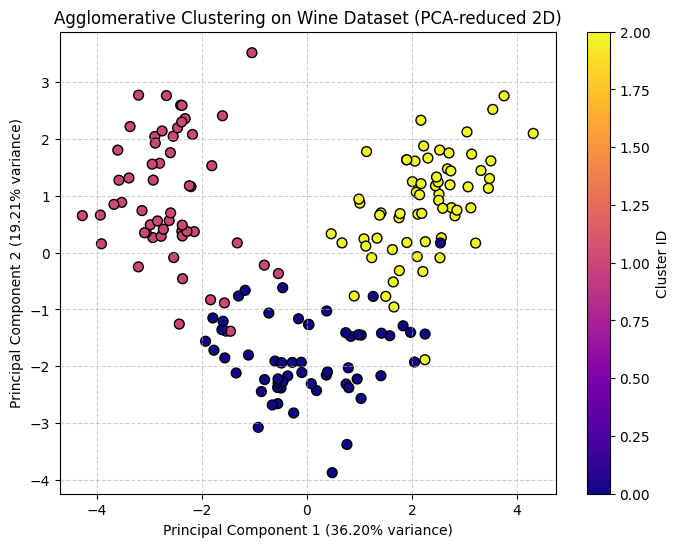

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data

# 2. Scale the data (Crucial for distance-based clustering and PCA)
X_scaled = StandardScaler().fit_transform(X)

# 3. Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Apply Agglomerative Clustering
# We use 3 clusters as there are 3 known classes in the wine dataset
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(X_scaled)

# 5. Visualize the result in 2D
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='plasma', s=50, edgecolors='k')

plt.title('Agglomerative Clustering on Wine Dataset (PCA-reduced 2D)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.colorbar(scatter, label='Cluster ID')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


#Question 10: You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories. Describe your real-world data science workflow using clustering:

● Which clustering algorithm(s) would you use and why?

● How would you preprocess the data (missing values, scaling)?

● How would you determine the number of clusters?

● How would the marketing team benefit from your clustering analysis?

(Include your Python code and output in the code box below.)

Answer:

1. Choice of Algorithms

* K-Means: My primary choice for its efficiency and ease of interpretation. Since marketing personas usually require distinct, non-overlapping groups, K-Means' spherical clusters are ideal for high-level segmentation.

* Agglomerative Clustering: I would use this on a sample of the data to generate a Dendrogram. This helps the marketing team visualize how "sub-segments" (e.g., "Budget Techies") merge into larger "Parent segments" (e.g., "Tech Enthusiasts").

2. Data Preprocessing

* Handling Missing Values: I would use Median Imputation for numerical data (like income) to stay robust against outliers, and Mode Imputation for categorical demographics.

* Feature Engineering: I would transform raw purchase history into RFM Metrics (Recency, Frequency, Monetary value).

* Scaling: I would apply StandardScaler to the RFM features so that a high "Monetary" value doesn't drown out "Recency.

3. Determining the Number of Clusters
* Quantitative: I would use the Elbow Method (WCSS) combined with Silhouette Analysis. A silhouette score near 1 indicates well-defined segments.
* Qualitative: I would consult the marketing team. If the Elbow Method suggests 10 clusters but the team only has the budget for 4 distinct campaigns, we would choose \(K=4\) for business utility

4. Marketing Benefits

* Personalization: Identifying "VIP" customers for loyalty rewards vs. "At-Risk" customers for win-back discounts.

* Inventory Optimization: Understanding which segments prefer specific categories (e.g., Electronics vs. Home Decor) to stock warehouses strategically.

#Python Simulation (RFM Workflow)


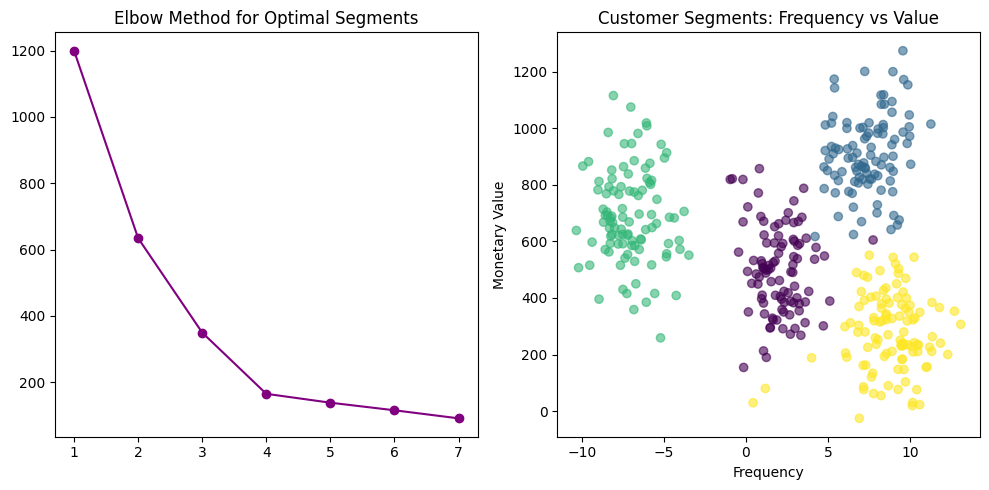

Segment Profile Samples:
            Recency_Score  Frequency_Score  Monetary_Value
Segment_ID                                                
0                4.915148         2.034078      498.695523
1               -9.096073         7.412462      908.970752
2               -6.885994        -7.035921      688.312657
3               -2.654425         8.807126      277.752600


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# 1. Simulate E-commerce RFM Data (Recency, Frequency, Monetary)
# 4 types of customers: VIPs, New Users, Hibernating, and Average
data, _ = make_blobs(n_samples=400, centers=4, cluster_std=1.5, random_state=42)
df = pd.DataFrame(data, columns=['Recency_Score', 'Frequency_Score'])
df['Monetary_Value'] = np.abs(df['Recency_Score'] * 100) + np.random.normal(0, 50, 400)

# 2. Preprocessing: Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 3. Determine Clusters (Elbow Method)
wcss = []
for i in range(1, 8):
    km = KMeans(n_clusters=i, n_init=10, random_state=42)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

# 4. Final Clustering (Assuming Elbow is at 4)
model = KMeans(n_clusters=4, n_init=10, random_state=42)
df['Segment_ID'] = model.fit_predict(scaled_data)

# 5. Visualization for Marketing
plt.figure(figsize=(10, 5))

# Plotting Frequency vs Monetary
plt.subplot(1, 2, 1)
plt.plot(range(1, 8), wcss, marker='o', color='purple')
plt.title('Elbow Method for Optimal Segments')

plt.subplot(1, 2, 2)
plt.scatter(df['Frequency_Score'], df['Monetary_Value'], c=df['Segment_ID'], cmap='viridis', alpha=0.6)
plt.title('Customer Segments: Frequency vs Value')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')

plt.tight_layout()
plt.show()

print("Segment Profile Samples:")
print(df.groupby('Segment_ID').mean())
